## The Environment Parameters
* Use discount factor, $\gamma = 0.9$
* The environment is slippery, ie., the transition kernel is stochastic
* The environment consists of 16 states. 
* The agent can take 4 actions 

In [141]:
import gym
env = gym.make('FrozenLake-v1', desc=None,map_name="4x4", is_slippery=True)
gamma = 0.9

In [142]:
#Obtaining environment details 
print('Number of Actions', env.action_space.n) 
print('Number of States ', env.observation_space.n)


Number of Actions 4
Number of States  16


## Generating a Heatmap 
* Use the following function fancy_visual to obtain a heat map. The arguments to the function are the value function and its corresponding policy. 
* This function also prints the value function and policy. 

In [143]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()


# Value Iteration

In [149]:
from numpy import linalg as LA
import matplotlib.pyplot as plt

state = env.reset()
iterations = 1000
L2Norm = []
V = [0 for i in range(env.observation_space.n)]
for i in range(iterations):
    V_next = V.copy()
    for state in range(env.observation_space.n):
        currentValue = V[state]
        actionValues = []
        for action in range(env.action_space.n): 
            stateValue = 0
            for (prob, x, r, terminal) in env.P[state][action]:
                stateValue +=  prob*(r + gamma*V[x])
            actionValues.append(stateValue)
        maxValue = max(actionValues)
        # optimalAction = actionValues.index(maxValue)
        V_next[state] = maxValue
    L2Norm.append(LA.norm([ val_curr - val_next for val_curr, val_next in zip (V, V_next)]))
    V = V_next

print(V)

[0.06889090488900329, 0.061414571509356086, 0.07440976196616092, 0.05580732147462067, 0.09185453985200442, 0.0, 0.11220820641168608, 0.0, 0.1454363547656737, 0.24749695460123428, 0.29961759273945937, 0.0, 0.0, 0.3799359011656479, 0.6390201481186109, 0.0]


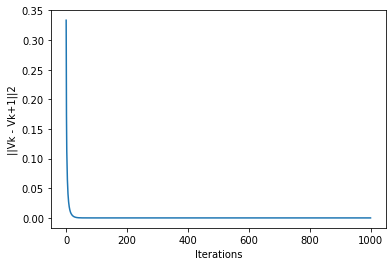

In [150]:
plt.plot(range(len(L2Norm)), L2Norm)
plt.xlabel('Iterations')
plt.ylabel('||Vk - Vk+1||2')
plt.show()
  

### Find Optimal Policy and Q value

Value Function [0.06889090488900329, 0.061414571509356086, 0.07440976196616092, 0.05580732147462067, 0.09185453985200442, 0.0, 0.11220820641168608, 0.0, 0.1454363547656737, 0.24749695460123428, 0.29961759273945937, 0.0, 0.0, 0.3799359011656479, 0.6390201481186109, 0.0]
Policy [0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]


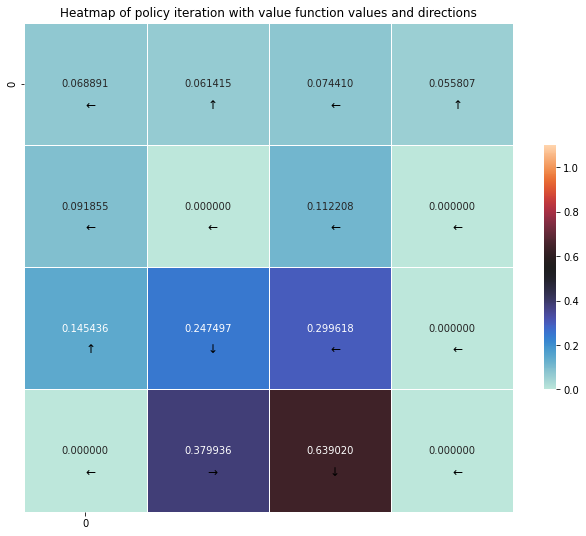

In [151]:
policy = [0]*env.observation_space.n
Q_opt = [[0] * env.action_space.n]*env.observation_space.n
for state in range(env.observation_space.n):
    actionValues = []
    for action in range(env.action_space.n):
        stateValue = 0
        for (prob, x, r, terminal) in env.P[state][action]:
            stateValue +=  prob*(r + gamma*V[x])
        actionValues.append(stateValue)
    Q_opt[state] = actionValues
    maxValue = max(actionValues)
    optimalAction = actionValues.index(maxValue)
    policy[state] = optimalAction

fancy_visual(V,policy) 

### Q function

In [152]:
print("Q Function:\n", np.array(Q_opt))
        

Q Function:
 [[0.0688909  0.066648   0.066648   0.05975891]
 [0.03909164 0.0429902  0.0407473  0.06141457]
 [0.07440976 0.06882903 0.07272759 0.0574895 ]
 [0.03906513 0.03906513 0.03348439 0.05580732]
 [0.09185454 0.07118727 0.06429818 0.04822363]
 [0.         0.         0.         0.        ]
 [0.11220821 0.08988528 0.11220821 0.02232293]
 [0.         0.         0.         0.        ]
 [0.07118727 0.11787999 0.10180545 0.14543635]
 [0.15761168 0.24749695 0.20386605 0.13351618]
 [0.29961759 0.26595513 0.22536851 0.10791155]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.18822986 0.30568681 0.3799359  0.26595513]
 [0.39557209 0.63902015 0.61492466 0.53719938]
 [0.         0.         0.         0.        ]]
